In [8]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import pandas as pd
import datetime as dt
import math
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta, MO


In [139]:
import seaborn as sns

In [9]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

['NanumGothic']


kospi 데이터 불러오기

In [11]:
kospi=pd.read_csv("kospi_data.csv") #고객정보

원데이터 불러오기

In [12]:
info=pd.read_csv("cus_ifo.csv") #고객정보
cus_ifg=pd.read_csv("cus_itg_sct_bnc.csv") #자산정보
cus_tot=pd.read_csv("cus_tot_aet_ifo.csv") #잔고정보
kr=pd.read_csv("kr_stk_orr.csv") #국내주식거래내역
oss=pd.read_csv("oss_stk_orr.csv") #해외주식거래내역

고객정보 변수분석

In [7]:
info.info()

NameError: name 'info' is not defined

In [6]:
info.describe()

,bse_ym,mts_mm_access_type,sex_dit_cd,cus_age_stn_cd,cus_aet_stn_cd,pft_amt_stn_cd,fst_act_opn_dt,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,hld_pdt_tp_sgm_cd,loy_sgm_cd,mrz_mkt_dit_cd,mrz_btp_dit_cd,aet_bse_stk_trd_tp_cd
count,59081.000000,59081.000000,59081.000000,59081.000000,59081.000000,59081.000000,5.908100e+04,59081.000000,59081.000000,59081.000000,59081.000000,59075.000000,59075.000000,57819.000000,57819.000000,57819.000000
mean,202203.521691,95299.317276,1.672754,7.807383,1.637311,1.052301,2.017648e+07,2.881756,4.726173,9.400789,2.613886,2.544393,4.351079,4.431778,13.424947,4.344454
std,1.705930,36523.597458,3.937728,17.314439,1.115536,0.454243,6.652490e+04,8.648666,4.619873,14.718682,2.388573,11.823100,0.950573,2.181053,3.907048,0.849637
min,202201.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.981020e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,202202.000000,110010.000000,1.000000,3.000000,1.000000,1.000000,2.019013e+07,2.000000,3.000000,5.000000,1.000000,1.000000,4.000000,2.000000,10.000000,4.000000
50%,202204.000000,111111.000000,2.000000,5.000000,1.000000,1.000000,2.020102e+07,2.000000,5.000000,9.000000,3.000000,1.000000,5.000000,6.000000,16.000000,5.000000
75%,202205.000000,111111.000000,2.000000,7.000000,2.000000,1.000000,2.021031e+07,2.000000,6.000000,9.000000,3.000000,1.000000,5.000000,6.000000,16.000000,5.000000
max,202206.000000,111111.000000,99.000000,99.000000,6.000000,16.000000,2.022063e+07,99.000000,99.000000,99.000000,99.000000,99.000000,6.000000,6.000000,16.000000,5.000000


In [150]:
cus_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cus_no                  10000 non-null  object 
 1   act_no                  10000 non-null  object 
 2   mts_mm_access_type      10000 non-null  int64  
 3   tot_aet_tld_rnd_202201  9594 non-null   float64
 4   tot_aet_tld_rnd_202202  9732 non-null   float64
 5   tot_aet_tld_rnd_202203  9807 non-null   float64
 6   tot_aet_tld_rnd_202204  9909 non-null   float64
 7   tot_aet_tld_rnd_202205  9954 non-null   float64
 8   tot_aet_tld_rnd_202206  10000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 703.2+ KB


In [13]:
#분석의 편의성을 위해 열 이름을 바꿔줌
info.columns=["고객번호(가명화)",
"계좌번호(가명화)",
"고객정보기준년월",
"MTS월단위접속패턴",
"성별",
"연령대",
"고객자산구간코드",
"수익금액구간코드",
"최초계좌개설일",
"주식상품보유여부",
"해외주식상품보유여부",
"주거래상품군",
"LIFESTAGE세그먼트코드",
"고객등급코드",
"총투자기간세그먼트코드",
"보유상품유형세그먼트코드",
"충성도세그먼트코드",
"주거래시장구분코드",
"주거래업종구분코드",
"자산기준주식거래유형코드",
"기본주식거래유형코드"
]
cus_ifg.columns=["계좌번호(가명화)",
"기준년월",
"종목코드",
"외화증권거래국가코드",
"통합상품유형코드",
"결제기준통합잔고수량",
"통합매수체결수량",
"통합매도체결수량",
"체결기준통합잔고수량",
"결제기준현재평가금액",
"결제기준외화현재평가금액",
"체결기준현재평가금액",
"체결기준외화현재평가금액",
"체결기준대출금액",
"거래통화코드"
]
cus_tot.columns=['고객번호(가명화)',
'계좌번호(가명화)',
'MTS월단위접속패턴',
'1월총자산',
'2월총자산',
'3월총자산',
'4월총자산',
'5월총자산',
'6월총자산'
]
kr.columns=['계좌번호(가명화)',
'주문날짜',
'주문순서',
'주문접수시간대',
'최종체결시간대',
'종목코드',
'매매구분코드',
'체결건수',
'체결외화단가',
'주문매체구분코드'
]
oss.columns=['계좌번호(가명화)',
'주문날짜',
'주문순서',
'주문접수시간대',
'최종체결시간대',
'종목코드',
'매매구분코드',
'체결건수',
'체결외화단가',
'주문매체구분코드',
'거래통화코드',
'거래통화환율'
]

In [188]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59075 entries, 0 to 59080
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   고객번호(가명화)        59075 non-null  object        
 1   계좌번호(가명화)        59075 non-null  object        
 2   고객정보기준년월         59075 non-null  int64         
 3   MTS월단위접속패턴       59075 non-null  int64         
 4   성별               59075 non-null  object        
 5   연령대              59075 non-null  int64         
 6   고객자산구간코드         59075 non-null  int64         
 7   수익금액구간코드         59075 non-null  int64         
 8   최초계좌개설일          59075 non-null  datetime64[ns]
 9   주식상품보유여부         59075 non-null  object        
 10  해외주식상품보유여부       59075 non-null  object        
 11  주거래상품군           59075 non-null  object        
 12  LIFESTAGE세그먼트코드  59075 non-null  object        
 13  고객등급코드           59075 non-null  int64         
 14  총투자기간세그먼트코드      59075 non-null  int64

In [14]:
#범주형 변수 설정해주기
info= info.astype({"고객정보기준년월":'int64',
                   "성별":'object',
                   "주거래상품군":'object',
                   "LIFESTAGE세그먼트코드":'object',
                   "보유상품유형세그먼트코드":'object',
                   "주거래시장구분코드":'object',
                   "주거래업종구분코드":'object',
                   "기본주식거래유형코드":'object'})
#날짜형 변수 설정해주기
info['최초계좌개설일']= pd.to_datetime(info['최초계좌개설일'], format='%Y%m%d')

In [15]:
#주식거래 데이터의 날짜변수를 날짜형으로 바꿔줌
kr['주문날짜']= pd.to_datetime(kr['주문날짜'], format='%Y%m%d')
oss['주문날짜']= pd.to_datetime(oss['주문날짜'], format='%Y%m%d')

In [ ]:
#MTS월단위접속패턴은 이번달 접속유무 변수로 바꿈 : 고객정보 기준년월과 연동

고객번호, 계좌번호의 1:1 대응 확인

In [47]:
info["고객번호(가명화)"].value_counts().sort_values()

09852b81a3a66001e3e0dc9c1ff811c1fa347d9cf8cbdec37566ea46a05d2674    1
df7d99cbb143befd269ef9f7625f8e2bc6618583016b0e2a1ca4724acf647f1b    1
e4747f3e836d3839110ed265a2a19e8ab79cbdf55fb3e8722a181035a51f200b    1
e9a90d7b244e17a958d5b2d14761cc10a103d6e689594cc322274fe412410ba3    1
f2a4bc422e7f6ec9ce230acc7bef6df718e10b27ce8b7bae310a359b4c0e32eb    1
                                                                   ..
ffdd75bc19c1f4e7ba8480e145371a41fdbd96c23e936970bcae349916add7ec    6
ffe1e3db98f0af57d8b306a897f41e5050bdf49e291cb4c84645ce861353922a    6
ffe47fddaa139cd618688872e7d9185568295cd3592f930a7284f52b9137beeb    6
ff9f4b44394bf88c7ce26fe9108c356d4e8ad42b1b9e5c4caf61c02b3294967a    6
267b289b9bcedde8648f7855222f0f01f5a157d6e147aa972f59ba1b115d5488    6
Name: 고객번호(가명화), Length: 10000, dtype: int64

In [34]:
info.groupby(["고객번호(가명화)"],as_index=False)["계좌번호(가명화)"].value_counts()
#고객번호와 계좌번호는 1:1로 매치되어있다, 따라서 데이터의 고객은 모두 단일계좌를 가짐

,고객번호(가명화),계좌번호(가명화),count
0,0005fb68e6d850f567c19da8cd5ef70ef4efe62f75d1be...,4d3aa24fa152e2400597eeb555416837e190f7ad3c31f5...,6
1,001e6bdd46e08a12eace85565b83ca75c1e431cfe27a99...,ba1f23e994076ec5c897ed29f1d1fc5b88f7fa7783ffe4...,6
2,002382843d3352889187bbe8b8d59c02d21e31739c8629...,466424452f716e6821ed6155868f6a9c55922826accba4...,6
3,002473234fd6d5f053f04bd224adba8788d1bec693e092...,2e2ca7a945fe3c0a7c91efd842255006cd1444e4ceea7c...,6
4,0024e6bc2995cb77135d7ab417f8e7c1facbe1e6683e7e...,a6db439c34c090827e7989f20568881a533e62d1baf2d2...,6
...,...,...,...
9995,ffe85d202701efded9cd32b2df04bd6308ab62234fe363...,b1ea2b5412f9b3f6a97b71da25a16290a4ff6599541d37...,6
9996,ffe96ec77b496a05a4b69c0e04edae34196d4adc55a7d9...,05a7e8bdbd9e430c97ae477b4e2f4a0c51e9d1c7349182...,6
9997,ffec37f3a5f7528aa0c6930050aeb6cc6fb4a318cce3aa...,d318cca47d6c48e1e9d83a49ed4c685c6a65996f7b3cd6...,6
9998,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,6


고객정보 결측치 보간 방법

In [40]:
info.isnull().sum()

고객번호(가명화)             0
계좌번호(가명화)             0
고객정보기준년월              0
MTS월단위접속패턴            0
성별                    0
연령대                   0
고객자산구간코드              0
수익금액구간코드              0
최초계좌개설일               0
주식상품보유여부              0
해외주식상품보유여부            0
주거래상품군                0
LIFESTAGE세그먼트코드       0
고객등급코드                0
총투자기간세그먼트코드           0
보유상품유형세그먼트코드          6
충성도세그먼트코드             6
주거래시장구분코드          1262
주거래업종구분코드          1262
자산기준주식거래유형코드       1262
기본주식거래유형코드            6
dtype: int64

주거래시장구분코드, 주거래업종구분코드: 기준년월의 채워진 데이터로 보간

In [16]:
info["주거래시장구분코드"]=info.groupby(["고객정보기준년월"],as_index=False)["주거래시장구분코드"].transform(lambda x: x.fillna(method='bfill'))

In [17]:
info["주거래업종구분코드"]=info.groupby(["고객정보기준년월"],as_index=False)["주거래업종구분코드"].transform(lambda x: x.fillna(method='bfill'))

기본주식거래유형코드 결측치 확인

In [18]:
info[info["기본주식거래유형코드"].isnull()]
#다른 변수들도 다 미정이거나 nan값을 가지므로 제거하기로 결정
info.dropna(axis=0, subset=['기본주식거래유형코드'], inplace=True)

In [246]:
info.isnull().sum()

고객번호(가명화)             0
계좌번호(가명화)             0
고객정보기준년월              0
MTS월단위접속패턴            0
성별                    0
연령대                   0
고객자산구간코드              0
수익금액구간코드              0
최초계좌개설일               0
주식상품보유여부              0
해외주식상품보유여부            0
주거래상품군                0
LIFESTAGE세그먼트코드       0
고객등급코드                0
총투자기간세그먼트코드           0
보유상품유형세그먼트코드          0
충성도세그먼트코드             0
주거래시장구분코드             0
주거래업종구분코드             0
자산기준주식거래유형코드       1167
기본주식거래유형코드            0
계좌보유기간                0
dtype: int64

성별, 연령대, LIFESTAGE세그먼트 변수는 단기간 내에 바뀌기 힘든 변수이므로 1-6월 데이터가 동일하다고 봄.
미정의값의 경우 같은 아이디의 전월 값이 있다면 해당값으로 대체하고 전월 값이 없다면 해당 아이디 제거

In [178]:
info.describe()

,고객정보기준년월,MTS월단위접속패턴,연령대,고객자산구간코드,수익금액구간코드,고객등급코드,총투자기간세그먼트코드,충성도세그먼트코드,자산기준주식거래유형코드
count,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,57813.000000
mean,202203.521693,95297.711350,7.798121,1.637207,1.052306,9.391689,2.604096,4.351079,4.344542
std,1.705930,36525.104575,17.290909,1.115534,0.454266,14.691702,2.182240,0.950573,0.849622
min,202201.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,202202.000000,110010.000000,3.000000,1.000000,1.000000,5.000000,1.000000,4.000000,4.000000
50%,202204.000000,111111.000000,5.000000,1.000000,1.000000,9.000000,3.000000,5.000000,5.000000
75%,202205.000000,111111.000000,7.000000,2.000000,1.000000,9.000000,3.000000,5.000000,5.000000
max,202206.000000,111111.000000,99.000000,6.000000,16.000000,99.000000,99.000000,6.000000,5.000000


In [189]:
for i in info.columns.values[2:]:
  if info[i].dtypes=='object':
    print("변수이름:",i)
    print(info[i].value_counts())

변수이름: 성별
2     30437
1     28543
99       95
Name: 성별, dtype: int64
변수이름: 주식상품보유여부
Y    53376
N     5699
Name: 주식상품보유여부, dtype: int64
변수이름: 해외주식상품보유여부
N    48501
Y    10574
Name: 해외주식상품보유여부, dtype: int64
변수이름: 주거래상품군
2     51535
3      5384
1      1361
99      466
8       116
10      110
9        50
6        21
15       18
4        12
12        2
Name: 주거래상품군, dtype: int64
변수이름: LIFESTAGE세그먼트코드
5     13775
2     11650
4      7468
6      6782
3      6581
9      4341
7      3463
1      2580
8      1628
10      704
99      103
Name: LIFESTAGE세그먼트코드, dtype: int64
변수이름: 보유상품유형세그먼트코드
1.0     55849
3.0      1354
4.0       987
99.0      873
2.0        12
Name: 보유상품유형세그먼트코드, dtype: int64
변수이름: 주거래시장구분코드
6.0    37638
1.0    12315
2.0     7057
5.0     2058
3.0        7
Name: 주거래시장구분코드, dtype: int64
변수이름: 주거래업종구분코드
16.0    37638
9.0      5134
10.0     4348
13.0     2731
5.0      2264
6.0      1411
14.0     1344
2.0       899
12.0      870
8.0       667
7.0       594
3.0       382
11.0      379
1.0

In [19]:
info["성별"].replace(99, np.NaN, inplace=True)
info["성별"].value_counts()
info["연령대"].replace(99, np.NaN, inplace=True)
info["연령대"].value_counts()
info["LIFESTAGE세그먼트코드"].replace(99, np.NaN, inplace=True)
info["LIFESTAGE세그먼트코드"].value_counts()

5.0     13775
2.0     11650
4.0      7468
6.0      6782
3.0      6581
9.0      4341
7.0      3463
1.0      2580
8.0      1628
10.0      704
Name: LIFESTAGE세그먼트코드, dtype: int64

In [20]:
info["성별"]=info.groupby(["고객번호(가명화)"],as_index=False)["성별"].transform(lambda x: x.fillna(method='bfill'))
info["연령대"]=info.groupby(["고객번호(가명화)"],as_index=False)["연령대"].transform(lambda x: x.fillna(method='bfill'))
info["LIFESTAGE세그먼트코드"]=info.groupby(["고객번호(가명화)"],as_index=False)["LIFESTAGE세그먼트코드"].transform(lambda x: x.fillna(method='bfill'))

In [21]:
info["성별"]=info.groupby(["고객번호(가명화)"],as_index=False)["성별"].transform(lambda x: x.fillna(method='ffill'))
info["연령대"]=info.groupby(["고객번호(가명화)"],as_index=False)["연령대"].transform(lambda x: x.fillna(method='ffill'))
info["LIFESTAGE세그먼트코드"]=info.groupby(["고객번호(가명화)"],as_index=False)["LIFESTAGE세그먼트코드"].transform(lambda x: x.fillna(method='ffill'))

In [22]:
info.isnull().sum()

고객번호(가명화)             0
계좌번호(가명화)             0
고객정보기준년월              0
MTS월단위접속패턴            0
성별                   95
연령대                1939
고객자산구간코드              0
수익금액구간코드              0
최초계좌개설일               0
주식상품보유여부              0
해외주식상품보유여부            0
주거래상품군                0
LIFESTAGE세그먼트코드      84
고객등급코드                0
총투자기간세그먼트코드           0
보유상품유형세그먼트코드          0
충성도세그먼트코드             0
주거래시장구분코드             0
주거래업종구분코드             0
자산기준주식거래유형코드       1262
기본주식거래유형코드            0
dtype: int64

In [23]:
info.dropna(axis=0, subset=['성별',"연령대","LIFESTAGE세그먼트코드"], inplace=True)

In [212]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57107 entries, 0 to 59080
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   고객번호(가명화)        57107 non-null  object        
 1   계좌번호(가명화)        57107 non-null  object        
 2   고객정보기준년월         57107 non-null  int64         
 3   MTS월단위접속패턴       57107 non-null  int64         
 4   성별               57107 non-null  float64       
 5   연령대              57107 non-null  float64       
 6   고객자산구간코드         57107 non-null  int64         
 7   수익금액구간코드         57107 non-null  int64         
 8   최초계좌개설일          57107 non-null  datetime64[ns]
 9   주식상품보유여부         57107 non-null  object        
 10  해외주식상품보유여부       57107 non-null  object        
 11  주거래상품군           57107 non-null  object        
 12  LIFESTAGE세그먼트코드  57107 non-null  float64       
 13  고객등급코드           57107 non-null  int64         
 14  총투자기간세그먼트코드      57107 non-null  int64

분석의 편의를 위해 주거래상품군,보유상품유형세그먼트코드,고객등급코드,총투자기간세그먼트코드 변수의 미정값 99를 0으로 바꿔줌

기본주식거래유형코드 결측치도 미정 데이터를 나타내므로 0으로 변환

In [24]:
info["주거래상품군"].replace(99, 0, inplace=True)
info["보유상품유형세그먼트코드"].replace(99, 0, inplace=True)
info["고객등급코드"].replace(99, 0, inplace=True)
info["총투자기간세그먼트코드"].replace(99, 0, inplace=True)
info["기본주식거래유형코드"].replace('_', 0, inplace=True)
info["자산기준주식거래유형코드"]=info["자산기준주식거래유형코드"].fillna(0)

In [25]:
#계좌보유기간: 최초계좌개설일-고객정보기준년월 (단위:6개월)
def term(month,start):
    dif=pd.to_datetime(month*100+1, format='%Y%m%d', errors='ignore')-start
    return dif.days
info["계좌보유기간"]=info.apply(lambda x: term(x["고객정보기준년월"],x["최초계좌개설일"]), axis=1)

In [26]:
info["계좌보유기간"]

0         -19
1         540
2         571
3         599
4         630
         ... 
59076    1282
59077    1310
59078    1341
59079    1371
59080    1402
Name: 계좌보유기간, Length: 57107, dtype: int64

In [27]:
#MTS월단위접속패턴을 월접속여부 변수로 가공
def mts_newval(month,pattern):
    default=list("000000")
    default[-len(list(str(pattern))):]=list(str(pattern))
    return default[month-202200-1]
  
info["월접속여부"]=info.apply(lambda x: mts_newval(x["고객정보기준년월"],x["MTS월단위접속패턴"]), axis=1)

In [28]:
info.drop(columns=["MTS월단위접속패턴"],inplace=True)

In [295]:
info

,고객번호(가명화),계좌번호(가명화),고객정보기준년월,성별,연령대,고객자산구간코드,수익금액구간코드,최초계좌개설일,주식상품보유여부,해외주식상품보유여부,...,고객등급코드,총투자기간세그먼트코드,보유상품유형세그먼트코드,충성도세그먼트코드,주거래시장구분코드,주거래업종구분코드,자산기준주식거래유형코드,기본주식거래유형코드,계좌보유기간,월접속여부
0,09852b81a3a66001e3e0dc9c1ff811c1fa347d9cf8cbde...,b41f362444ccb3be1f46657e52d30dd28fd2fb52984f27...,202206,1.0,6.0,1,1,2022-06-20,Y,N,...,0,1,1.0,4.0,1.0,9.0,5.0,3,-19,1
1,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202201,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,540,0
2,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202202,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,571,0
3,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202203,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,599,0
4,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202204,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59076,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202202,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,5.0,6.0,16.0,5.0,10,1282,1
59077,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202203,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,5.0,6.0,16.0,5.0,10,1310,1
59078,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202204,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,4.0,2.0,10.0,5.0,3,1341,1
59079,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202205,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,4.0,2.0,10.0,5.0,4,1371,1


고객정보 데이터에 고객자산정보 데이터 합쳐주기
고객총자산 변수: 해당 기준월(말일기준) 총자산

In [29]:
cus_tot2=pd.melt(cus_tot,id_vars=['고객번호(가명화)','계좌번호(가명화)','MTS월단위접속패턴'],var_name='고객정보기준년월',value_name='고객총자산')

In [30]:
#기준년월을 yyyymm형태로 바꿔주기
cus_tot2["고객정보기준년월"]=cus_tot2["고객정보기준년월"].transform(lambda x: 202200+int(re.sub(r'[^0-9]', '', x)))

In [31]:
cus_tot2["월접속여부"]=cus_tot2.apply(lambda x: mts_newval(x["고객정보기준년월"],x["MTS월단위접속패턴"]), axis=1)
cus_tot2.drop(columns=["MTS월단위접속패턴"],inplace=True)

In [32]:
cus_tot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객번호(가명화)  60000 non-null  object 
 1   계좌번호(가명화)  60000 non-null  object 
 2   고객정보기준년월   60000 non-null  int64  
 3   고객총자산      58996 non-null  float64
 4   월접속여부      60000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [33]:
cus_tot2.reset_index(drop=True)
info.reset_index(drop=True)

,고객번호(가명화),계좌번호(가명화),고객정보기준년월,성별,연령대,고객자산구간코드,수익금액구간코드,최초계좌개설일,주식상품보유여부,해외주식상품보유여부,...,고객등급코드,총투자기간세그먼트코드,보유상품유형세그먼트코드,충성도세그먼트코드,주거래시장구분코드,주거래업종구분코드,자산기준주식거래유형코드,기본주식거래유형코드,계좌보유기간,월접속여부
0,09852b81a3a66001e3e0dc9c1ff811c1fa347d9cf8cbde...,b41f362444ccb3be1f46657e52d30dd28fd2fb52984f27...,202206,1.0,6.0,1,1,2022-06-20,Y,N,...,0,1,1.0,4.0,1.0,9.0,5.0,3,-19,1
1,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202201,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,540,0
2,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202202,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,571,0
3,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202203,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,599,0
4,098db942d55a6965a71d162a1b301cd80a329c9b6d682a...,b4679196522d2038c8afbdc6b020f518b3107979d02d1d...,202204,1.0,3.0,1,1,2020-07-10,N,N,...,9,2,3.0,6.0,6.0,16.0,0.0,_,630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57102,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202202,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,5.0,6.0,16.0,5.0,10,1282,1
57103,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202203,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,5.0,6.0,16.0,5.0,10,1310,1
57104,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202204,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,4.0,2.0,10.0,5.0,3,1341,1
57105,fff442e2713fded743368b21a42bc278406ab98c37b299...,5752201c1c8d2b7acfa7bfb7684e01c5d45a35bed61331...,202205,1.0,3.0,1,1,2018-07-30,Y,N,...,9,2,1.0,4.0,2.0,10.0,5.0,4,1371,1


In [34]:
cus_info=pd.merge(info, cus_tot2, on=['고객번호(가명화)','계좌번호(가명화)','월접속여부','고객정보기준년월'],how='left')

In [35]:
cus_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57107 entries, 0 to 57106
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   고객번호(가명화)        57107 non-null  object        
 1   계좌번호(가명화)        57107 non-null  object        
 2   고객정보기준년월         57107 non-null  int64         
 3   성별               57107 non-null  float64       
 4   연령대              57107 non-null  float64       
 5   고객자산구간코드         57107 non-null  int64         
 6   수익금액구간코드         57107 non-null  int64         
 7   최초계좌개설일          57107 non-null  datetime64[ns]
 8   주식상품보유여부         57107 non-null  object        
 9   해외주식상품보유여부       57107 non-null  object        
 10  주거래상품군           57107 non-null  int64         
 11  LIFESTAGE세그먼트코드  57107 non-null  float64       
 12  고객등급코드           57107 non-null  int64         
 13  총투자기간세그먼트코드      57107 non-null  int64         
 14  보유상품유형세그먼트코드     57107 non-null  float

Text(0, 0.5, '계좌보유기간')

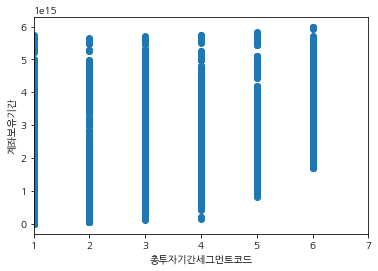

In [240]:
plt.scatter(info['총투자기간세그먼트코드'],info["계좌보유기간"])
plt.xlim([1,7])
plt.xlabel('총투자기간세그먼트코드')
plt.ylabel('계좌보유기간')

국내/해외 주식거래 데이터 통합

In [76]:
#국내주식거래와 해외주식거래 데이터는 변수가 같기 때문에 세로로 데이터를 이어붙이고 국내/해외를 구분하는 domestic 변수를 추가
#국내주식여부: 국내주식=1, 해외주식=0
kr['국내주식여부']=1
oss['국내주식여부']=0

In [77]:
stk=pd.concat([kr, oss],axis=0,join='outer')

고객정보데이터 분포 살펴보기

array([[<AxesSubplot:title={'center':'고객정보기준년월'}>,
        <AxesSubplot:title={'center':'성별'}>,
        <AxesSubplot:title={'center':'연령대'}>,
        <AxesSubplot:title={'center':'고객자산구간코드'}>],
       [<AxesSubplot:title={'center':'수익금액구간코드'}>,
        <AxesSubplot:title={'center':'최초계좌개설일'}>,
        <AxesSubplot:title={'center':'주거래상품군'}>,
        <AxesSubplot:title={'center':'LIFESTAGE세그먼트코드'}>],
       [<AxesSubplot:title={'center':'고객등급코드'}>,
        <AxesSubplot:title={'center':'총투자기간세그먼트코드'}>,
        <AxesSubplot:title={'center':'보유상품유형세그먼트코드'}>,
        <AxesSubplot:title={'center':'충성도세그먼트코드'}>],
       [<AxesSubplot:title={'center':'자산기준주식거래유형코드'}>,
        <AxesSubplot:title={'center':'계좌보유기간'}>,
        <AxesSubplot:title={'center':'고객총자산'}>, <AxesSubplot:>]],
      dtype=object)

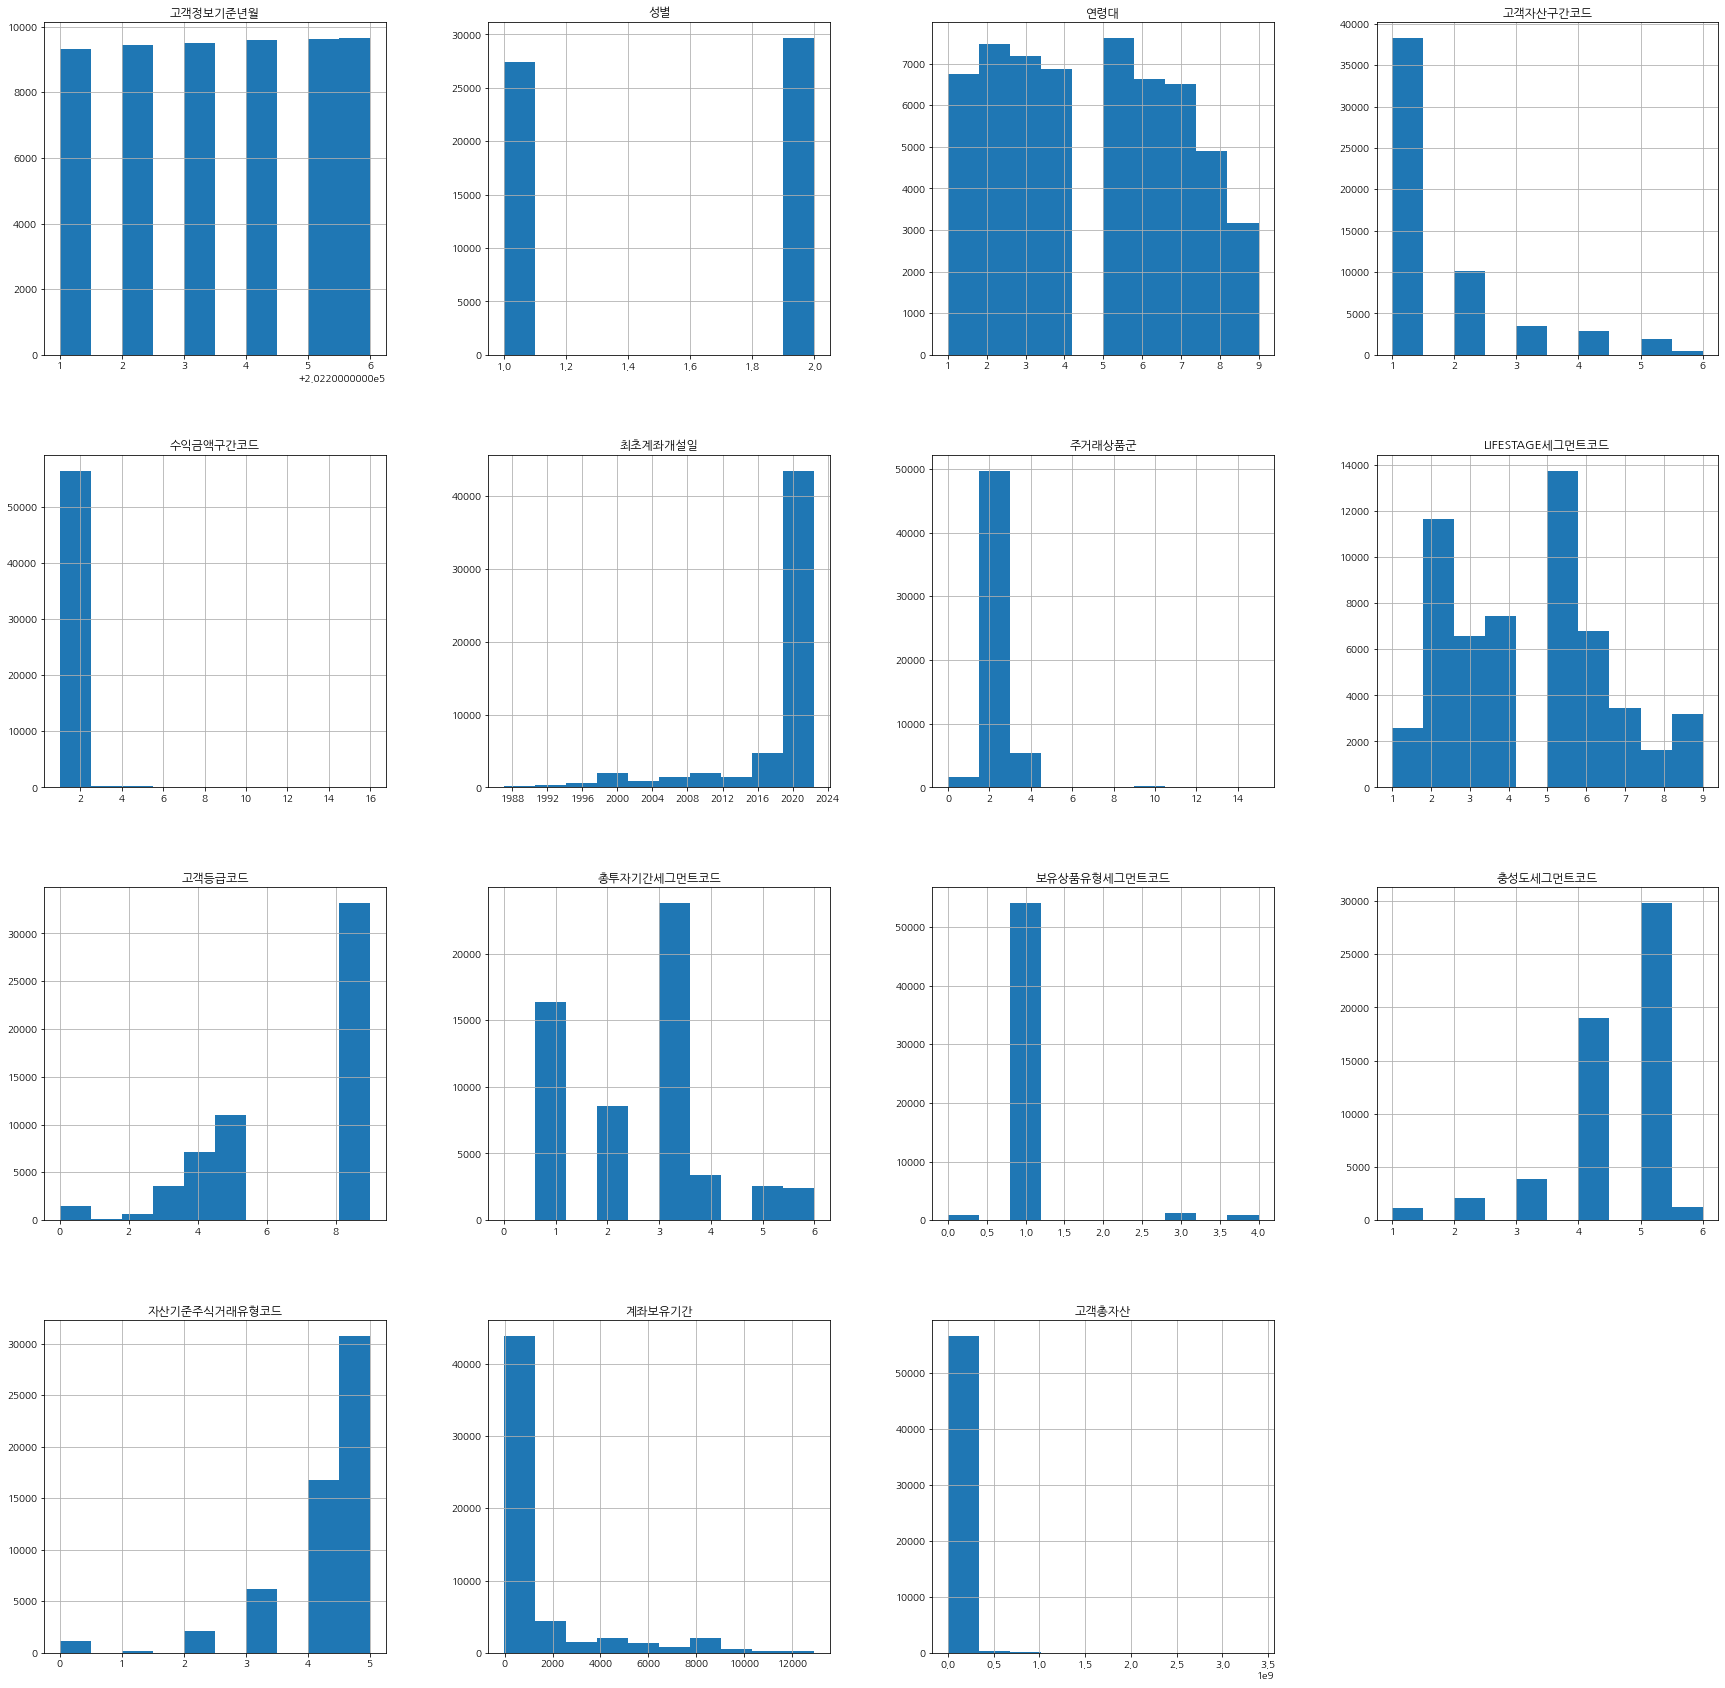

In [301]:
cus_info.hist(figsize=(30,30))

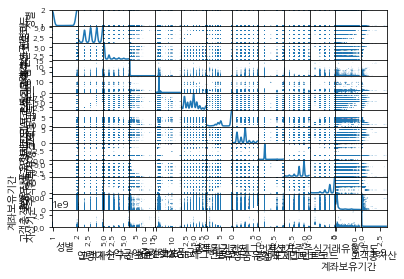

In [147]:
from pandas.plotting import scatter_matrix
cus_pairplot=cus_info.drop(columns=['고객번호(가명화)','계좌번호(가명화)','고객정보기준년월','최초계좌개설일','주거래시장구분코드','주거래업종구분코드'])
scatter_matrix(cus_pairplot, alpha=0.5, diagonal='kde',s=1)
plt.show()

KeyboardInterrupt: 

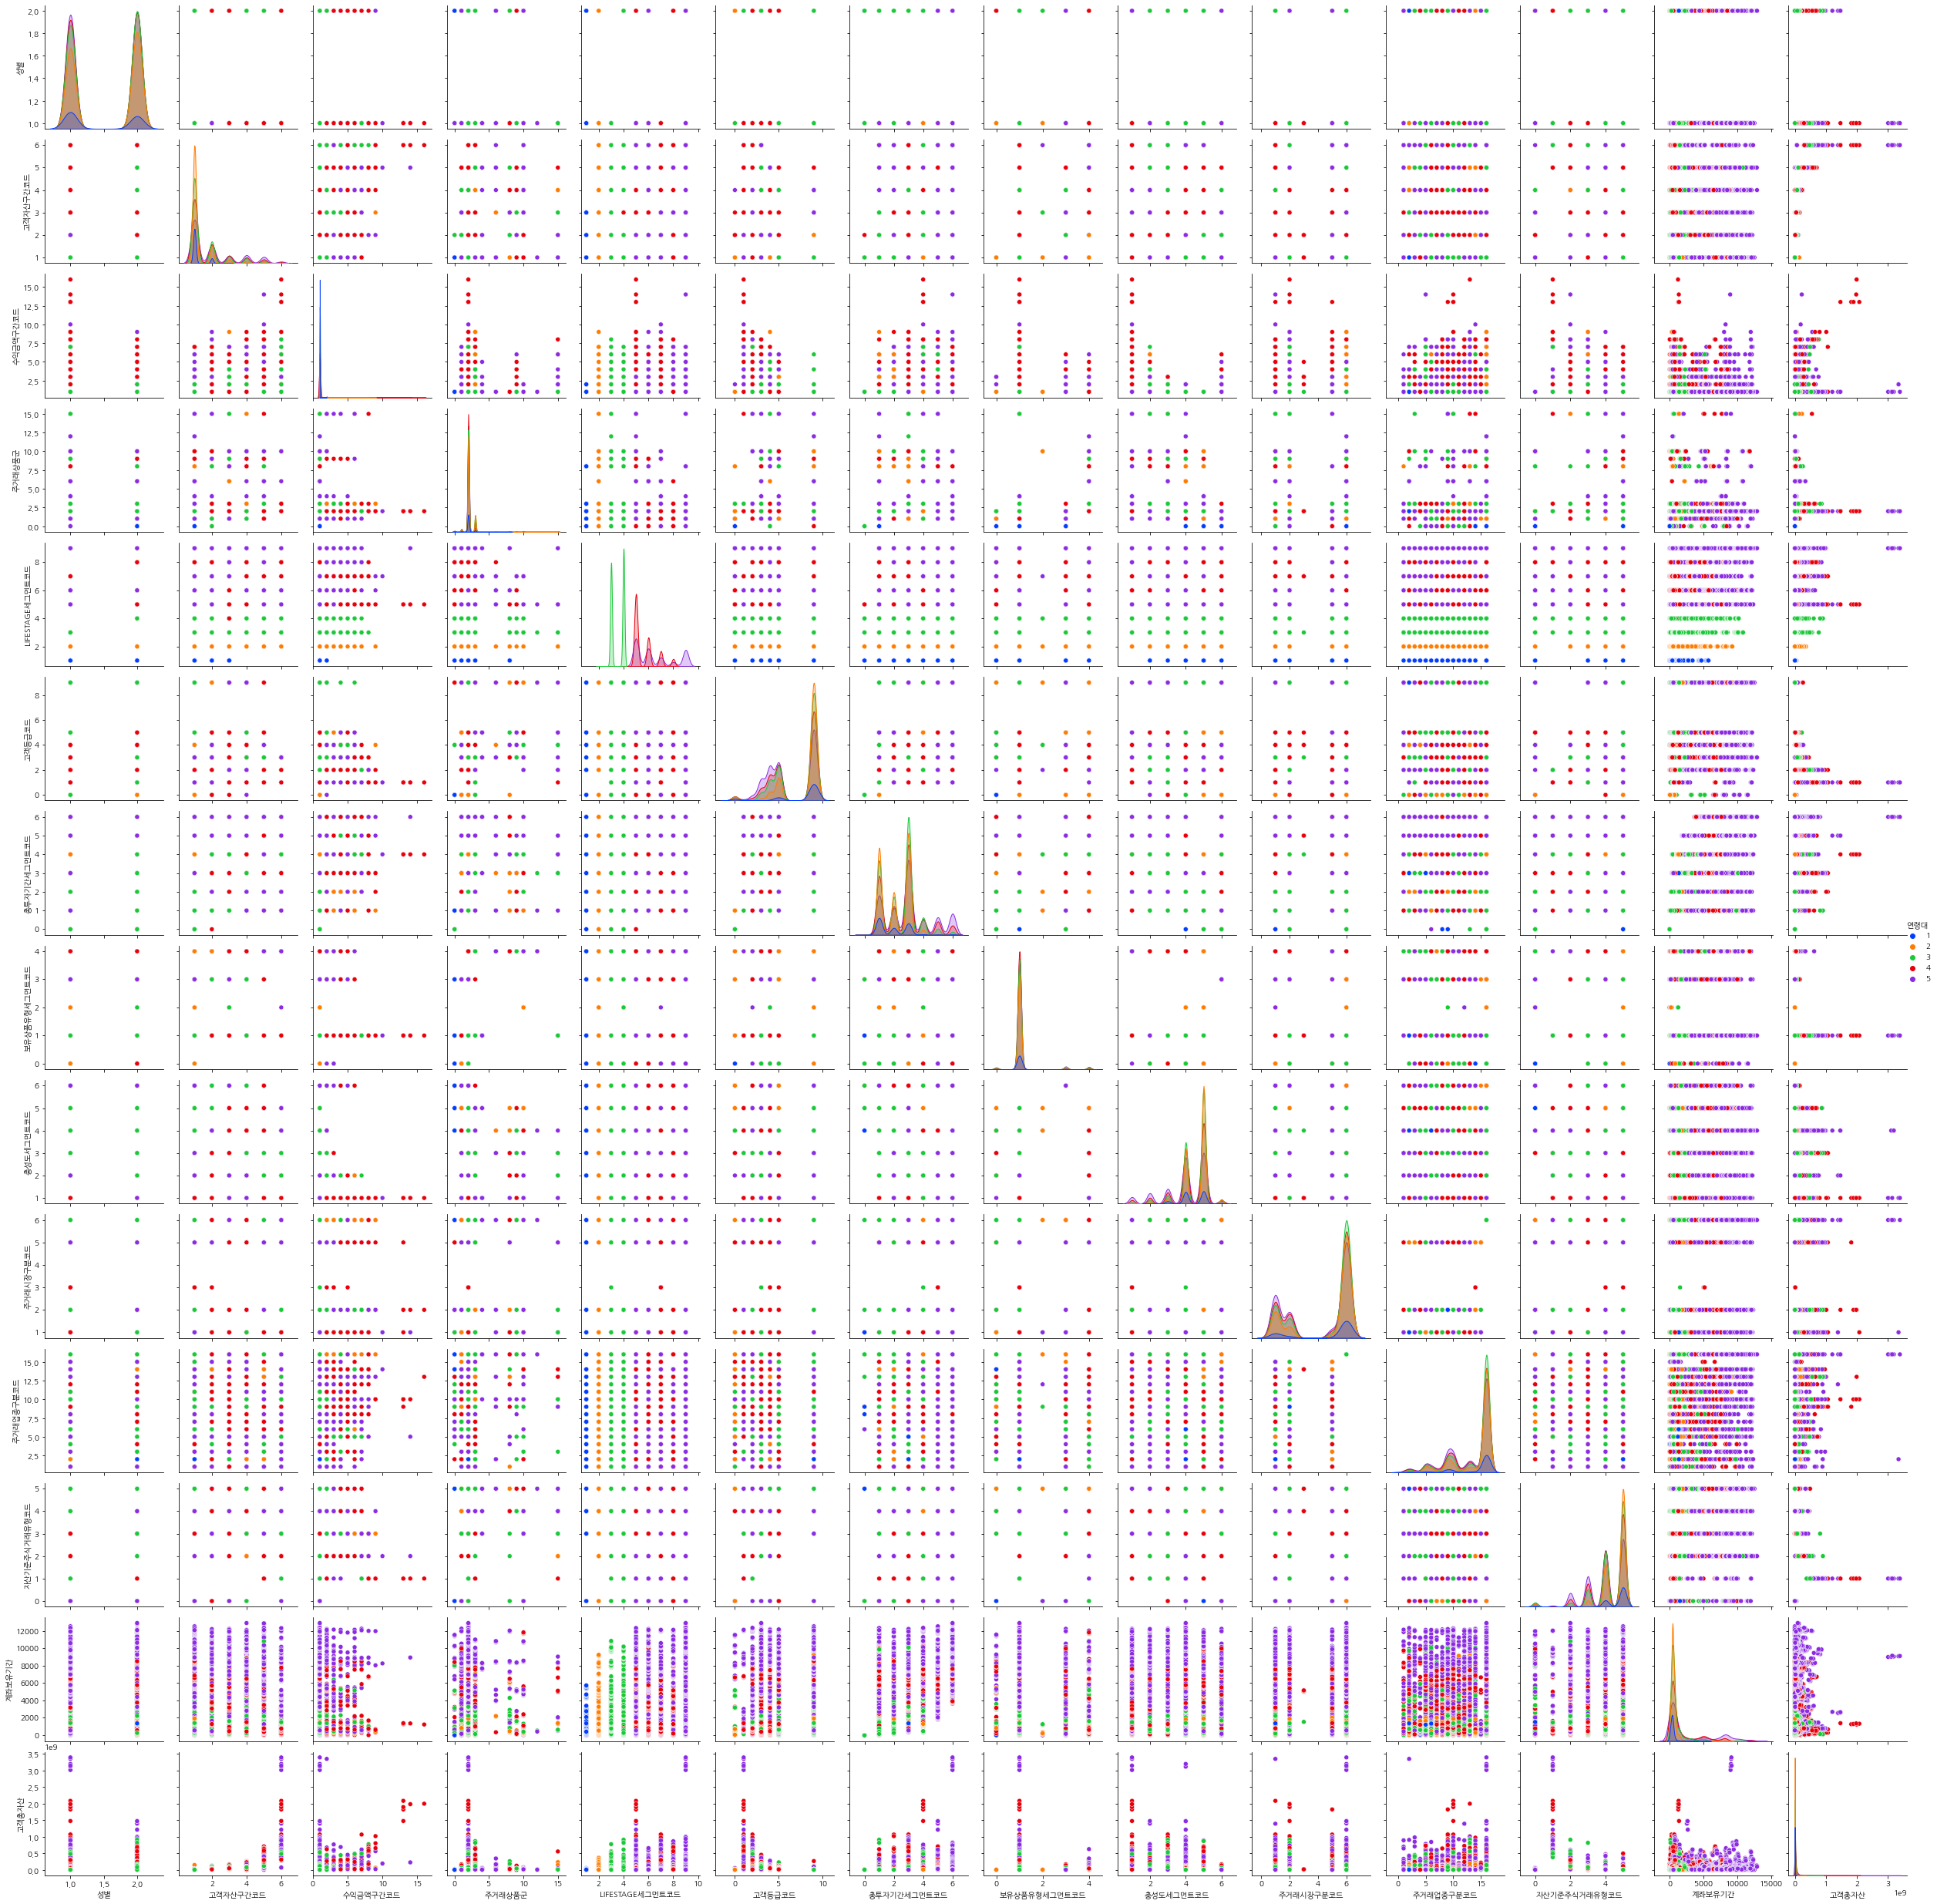

In [144]:
sns.pairplot(cus_pairplot,
             diag_kind='kde',
             hue='연령대',
             palette='bright')
plt.show()

In [ ]:
print(cus_info.corr(method='pearson'))

In [71]:
#카테고리별 누적 count 그래프를 그리는 메서드
#index_var: x축 변수
#group_var:카테고리 변수
#id_var: count할 변수
#cumsum: 새로 생성할 누적변수 이름, 문자열
#method: 열 변수 방법, cnt: id_var.count(), cum: cumsum으로 반영
#xn: 마지막 몇개의 값을 그래프에 반영할건지 결정, 디폴트: 0(전체값 반영)

def make_graph_df(cus_info,index_var,group_var,id_var,cumsum,method="cnt",xn=0,color="hsv"):
    cus_info2=cus_info[[index_var,group_var,id_var]]
    cus_info2[index_var]=cus_info2[index_var].dt.strftime('%Y%m')
    cus_info2.drop_duplicates(inplace=True)
    cus_info2=cus_info2.reset_index(drop=True)
    cus_info2=pd.DataFrame(cus_info2.groupby([index_var,group_var])[id_var].count())
    cus_info2[cumsum]=cus_info2.groupby([group_var])[id_var].cumsum()
    cus_info2.reset_index(drop=False,inplace=True)
    if method=="cum":
        method=cumsum
        method_name=cumsum
    else:
        method=id_var
        method_name="count"
    cus_info2=pd.pivot_table(cus_info2,values=method, 
                    index=[index_var],columns=group_var)
    plot=cus_info2.iloc[-xn:,].plot(legend=True,figsize=(5,7),colormap=color,linewidth=2.0)
    plot.set_ylabel(method_name)
    plt.show()

20-30대 신규 고객수가 중장년층에 비해 더 크게 상승한것이 보이지만 기존 변수가 5세 단위로 나뉘어져 있어서 범주가 너무 많음, 따라서 연령대 범주를 10세 단위로 통합
연령대 범주 통합
미성년자:1
20-30: 2
30-40: 3
40-50: 4
50-65: 5

In [39]:
def age_re(x,y):
    if x<=2:
        if y==1:
            return 1
        else:
            return 2
    elif x<=4:
        return 3
    elif x<=6:
        return 4
    else:
        return 5
    
cus_info["연령대"]=cus_info.apply(lambda x: age_re(x["연령대"],x["LIFESTAGE세그먼트코드"]), axis=1)

C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2[index_var]=cus_info2[index_var].dt.strftime('%Y%m')
C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2.drop_duplicates(inplace=True)


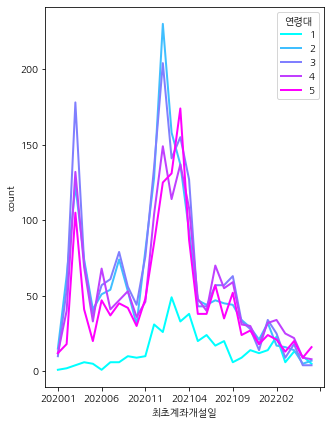

In [73]:
make_graph_df(cus_info,'최초계좌개설일',"연령대","고객번호(가명화)",'누적고객수',method='cnt',xn=30,color="cool")

C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2[index_var]=cus_info2[index_var].dt.strftime('%Y%m')
C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2.drop_duplicates(inplace=True)


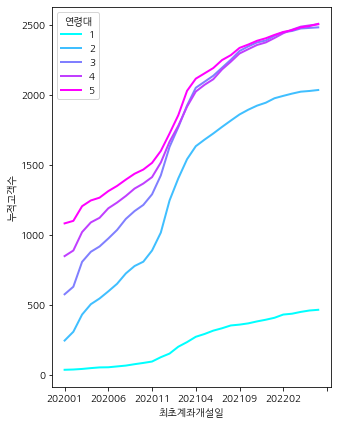

In [72]:
make_graph_df(cus_info,'최초계좌개설일',"연령대","고객번호(가명화)",'누적고객수',method='cum',xn=30,color="cool")

누적고객의 절대적 양은 40,50대가 많지만 20,30대의 증가폭이 더 큼

lifestage세그먼트 코드를 사용한 분석

C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2[index_var]=cus_info2[index_var].dt.strftime('%Y%m')
C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2.drop_duplicates(inplace=True)


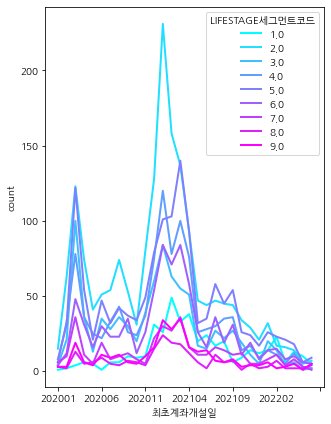

In [74]:
make_graph_df(cus_info,'최초계좌개설일',"LIFESTAGE세그먼트코드","고객번호(가명화)",'누적고객수',method='cnt',xn=30,color="cool")

C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2[index_var]=cus_info2[index_var].dt.strftime('%Y%m')
C:\Users\yoonseo\AppData\Local\Temp\ipykernel_29972\3611207287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_info2.drop_duplicates(inplace=True)


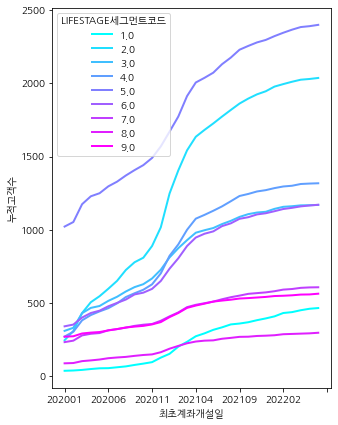

In [75]:
make_graph_df(cus_info,'최초계좌개설일',"LIFESTAGE세그먼트코드","고객번호(가명화)",'누적고객수',method='cum',xn=30,color="cool")

In [ ]:
make_graph_df(cus_info,'기준년월',"LIFESTAGE세그먼트코드","고객번호(가명화)",'누적고객수',method='cnt',xn=30,color="cool")

In [78]:
def getStockCode(market):
    if market == 'kosdaq':
        url_market = 'kosdaqMkt'
    elif market == 'kospi':
        url_market = 'stockMkt'
    else:
        print('invalid market ')
        return

    url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13&marketType=%s' % url_market
    df = pd.read_html(url, header=0)[0]

    return df


if __name__ == '__main__':
    result_df = getStockCode('kosdaq')
    kosdaq=result_df

             회사명    종목코드                    업종  \
0     CJ 바이오사이언스  311690       자연과학 및 공학 연구개발업   
1           ES큐브   50120              생활용품 도매업   
2           HPSP  403870         특수 목적용 기계 제조업   
3     IBKS제17호스팩  405350            금융 지원 서비스업   
4            ISC   95340              전자부품 제조업   
...          ...     ...                   ...   
1582        한컴위드   54920        소프트웨어 개발 및 공급업   
1583          한탑    2680  곡물가공품, 전분 및 전분제품 제조업   
1584     헥토이노베이션  214180            기타 정보 서비스업   
1585      홈센타홀딩스   60560             기타 전문 도매업   
1586          힘스  238490         특수 목적용 기계 제조업   

                                주요제품         상장일  결산월                대표자명  \
0           생명정보 플랫폼, 마이크로바이옴 분석 서비스  2019-12-26  12월                 천종식   
1                         텐트, 원 ·부자재  2002-04-25  12월                 신희민   
2                       고압 수소 어닐링 장비  2022-07-15  12월                 김용운   
3                          금융 지원 서비스  2022-02-18  12월                 이경준   
4             

국내 주식종목코드 데이터 가져오기(코스피, 코스닥, 코넥스 종목 전체)

In [79]:
!pip install finance-datareader

Defaulting to user installation because normal site-packages is not writeable


In [80]:
stocks=fdr.StockListing('KRX')

In [81]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7875 entries, 0 to 7874
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7875 non-null   object        
 1   Market          7875 non-null   object        
 2   Name            7875 non-null   object        
 3   Sector          2535 non-null   object        
 4   Industry        2519 non-null   object        
 5   ListingDate     2535 non-null   datetime64[ns]
 6   SettleMonth     2535 non-null   object        
 7   Representative  2535 non-null   object        
 8   HomePage        2373 non-null   object        
 9   Region          2534 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 676.8+ KB


In [88]:
#필요없는 열 제거
stocks.drop(columns=['SettleMonth','Representative','HomePage','Region'],inplace=True)

In [90]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7875 entries, 0 to 7874
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Symbol       7875 non-null   object        
 1   Market       7875 non-null   object        
 2   Name         7875 non-null   object        
 3   Sector       2535 non-null   object        
 4   Industry     2519 non-null   object        
 5   ListingDate  2535 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 430.7+ KB


In [91]:
#종목코드 앞에 A(국내)붙여주기
stocks['Symbol']=stocks['Symbol'].apply(lambda x: "A"+x)

In [130]:
stocks

,Symbol,Market,Name,Sector,Industry,ListingDate
0,A060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23
1,A095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21
2,A006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11
3,A054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04
4,A265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07
...,...,...,...,...,...,...
7870,A435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT
7871,A437550,KOSPI,히어로즈 글로벌리츠이지스액티브,NaN,NaN,NaT
7872,A419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT
7873,A429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT


In [124]:
#stk 종목코드 변수에서 공백 제거
stk["종목코드"]=stk["종목코드"].apply(lambda x: x.replace(" ", ""))

In [126]:
stock_data=pd.merge(stk,stocks,left_on="종목코드",right_on='Symbol',how='left')

In [127]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555488 entries, 0 to 555487
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   계좌번호(가명화)    555488 non-null  object        
 1   주문날짜         555488 non-null  datetime64[ns]
 2   주문순서         555488 non-null  int64         
 3   주문접수시간대      555488 non-null  int64         
 4   최종체결시간대      555488 non-null  int64         
 5   종목코드         555488 non-null  object        
 6   매매구분코드       555488 non-null  int64         
 7   체결건수         555488 non-null  float64       
 8   체결외화단가       555488 non-null  float64       
 9   주문매체구분코드     555488 non-null  int64         
 10  국내주식여부       555488 non-null  int64         
 11  거래통화코드       51902 non-null   object        
 12  거래통화환율       51902 non-null   float64       
 13  Symbol       498238 non-null  object        
 14  Market       498238 non-null  object        
 15  Name         498238 non-null  obje

In [131]:
#중복되는 Symbol 변수 삭제
stock_data.drop(columns="Symbol",inplace=True)

KeyError: "['Symbol'] not found in axis"

In [135]:
#영어변수명 바꿔주기
stock_data.rename(columns={'Market':'거래시장', 'Name':'기업명', 'Sector':'거래업종', 'Industry':'주상품군', 'ListingDate':'상장일'},inplace=True)

In [136]:
#종목별 거래업종 원데이터 기준대로 구분
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555488 entries, 0 to 555487
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   계좌번호(가명화)  555488 non-null  object        
 1   주문날짜       555488 non-null  datetime64[ns]
 2   주문순서       555488 non-null  int64         
 3   주문접수시간대    555488 non-null  int64         
 4   최종체결시간대    555488 non-null  int64         
 5   종목코드       555488 non-null  object        
 6   매매구분코드     555488 non-null  int64         
 7   체결건수       555488 non-null  float64       
 8   체결외화단가     555488 non-null  float64       
 9   주문매체구분코드   555488 non-null  int64         
 10  국내주식여부     555488 non-null  int64         
 11  거래통화코드     51902 non-null   object        
 12  거래통화환율     51902 non-null   float64       
 13  거래시장       498238 non-null  object        
 14  기업명        498238 non-null  object        
 15  거래업종       473596 non-null  object        
 16  주상품군       469998 no

In [137]:
cus_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57107 entries, 0 to 57106
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   고객번호(가명화)        57107 non-null  object        
 1   계좌번호(가명화)        57107 non-null  object        
 2   고객정보기준년월         57107 non-null  int64         
 3   성별               57107 non-null  float64       
 4   연령대              57107 non-null  int64         
 5   고객자산구간코드         57107 non-null  int64         
 6   수익금액구간코드         57107 non-null  int64         
 7   최초계좌개설일          57107 non-null  datetime64[ns]
 8   주식상품보유여부         57107 non-null  object        
 9   해외주식상품보유여부       57107 non-null  object        
 10  주거래상품군           57107 non-null  int64         
 11  LIFESTAGE세그먼트코드  57107 non-null  float64       
 12  고객등급코드           57107 non-null  int64         
 13  총투자기간세그먼트코드      57107 non-null  int64         
 14  보유상품유형세그먼트코드     57107 non-null  float

In [138]:
#stock_data[stock_data['종목코드']=="A377330"]
#공모주 확인

,계좌번호(가명화),주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결건수,체결외화단가,주문매체구분코드,국내주식여부,거래통화코드,거래통화환율,거래시장,기업명,거래업종,주상품군,상장일
2885,9413382a8a8968cb18a4b9bcfa45ce58010b59d3736f07...,2022-03-03,104,12,12,A377330,1,15.0,18700.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
2888,9413382a8a8968cb18a4b9bcfa45ce58010b59d3736f07...,2022-03-03,101,11,11,A377330,2,15.0,18250.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
2889,9413382a8a8968cb18a4b9bcfa45ce58010b59d3736f07...,2022-03-03,100,11,11,A377330,1,10.0,18650.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
2890,9413382a8a8968cb18a4b9bcfa45ce58010b59d3736f07...,2022-03-03,99,11,11,A377330,2,10.0,18350.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
2891,9413382a8a8968cb18a4b9bcfa45ce58010b59d3736f07...,2022-03-03,98,11,11,A377330,1,25.0,18450.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503344,87e0754038dab321d0e316ab91604a971997198c953d6a...,2022-02-04,1,9,9,A377330,1,1.0,25700.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
503406,3115d987c7598f0b63cc8ab1fff05fe606f12b1df22c4c...,2022-02-04,1,9,9,A377330,1,1.0,26750.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
503452,c7803445ac212d34fff8b43349a6be8858af7c7d605a56...,2022-02-04,1,9,9,A377330,1,1.0,25450.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04
503518,50a3f1b494099e8f81b2b9e131352a75803c761b5ecc63...,2022-02-04,1,9,9,A377330,2,1.0,28000.0,3,1,NaN,NaN,KOSDAQ,이지트로닉스,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전력변환장치,2022-02-04


In [ ]:
#고객자산정보 데이터 활용 : 계좌별로 월별 주식 매수/매도량의 합 구하기
cus_tot.groupby(['계좌번호(가명화)','기준년월'])["통합매수체결수량"].count()
cus_tot.groupby(['계좌번호(가명화)','기준년월'])["통합매도체결수량"].count()